In [1]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from IPython.display import display, Markdown

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
from data import load_train_val_examples, GAPLabel

In [2]:
model_dir = Path('../output/submission1/trial_1')
    
train_examples, val_examples = load_train_val_examples(42)
examples = {e.id: e for e in train_examples + val_examples}

results = pd.read_csv(model_dir / 'val_predictions.csv')
top_mistakes = results.sort_values('LOSS', ascending=False).head(int(0.1 * results.shape[0]))

/home/yasserglez/.pyenv/versions/3.7.2/envs/gendered-pronoun-resolution/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


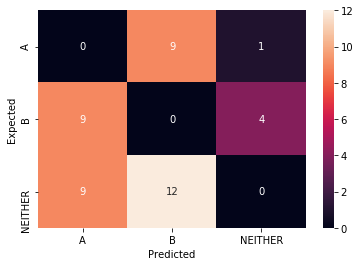

In [3]:
labels = [l.name for l in GAPLabel]
y_true = top_mistakes.LABEL.values
y_pred = [labels[i] for i in np.argmax(top_mistakes[labels].values, axis=1)]
matrix = pd.DataFrame(confusion_matrix(y_true, y_pred), index=labels, columns=labels)
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Expected');

In [4]:
def display_mistake(example, row):
    tokens = list(example.tokens)
    
    pronoun_color = 'green'
    a_color = 'red'
    b_color = 'blue'
    
    mentions = [('pronoun', example.pronoun_index), ('a', example.a_end), ('b', example.b_end)]
    for mention, _ in sorted(mentions, key=lambda x: x[1], reverse=True):
        if mention == 'pronoun':
            tokens.insert(example.pronoun_index, f'**<span style="color:{pronoun_color}">')
            tokens.insert(example.pronoun_index + 2, '</span>**')    
        elif mention == 'a':
            tokens.insert(example.a_start, f'**<span style="color:{a_color}">')
            tokens.insert(example.a_end + 1, '</span>**')
        elif mention == 'b':
            tokens.insert(example.b_start, f'**<span style="color:{b_color}">')
            tokens.insert(example.b_end + 1, '</span>**')
    
    escape_tokens = {'`': '&grave;'}
    colors = {'A': a_color, 'B': b_color, 'NEITHER': 'gray'}
    labels = ['A', 'B', 'NEITHER']
    i = np.argmax([getattr(row, l) for l in labels])
    
    output = ('\n<u>ID:</u> {}<br><u>URL:</u> {}<br>' 
              '<u>Expected:</u> **<span style="color:{}">{}</span>**<br>'
              '<u>Predicted:</u> **<span style="color:{}">{}</span>**<br>'
              '<u>Text:</u> {}') \
        .format(row.ID, example.url, 
                colors[row.LABEL], row.LABEL, 
                colors[labels[i]], labels[i],
               ' '.join(escape_tokens.get(t, t) for t in tokens))
    display(Markdown(output))

for row in top_mistakes.itertuples():
    example = examples[row.ID]
    display_mistake(example, row)


<u>ID:</u> development-1745<br><u>URL:</u> http://en.wikipedia.org/wiki/Sir_Herbert_Whitfield<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Her unmarried brother Richard Peirson became a lawyer and landowner . They had seven children , including : Herbert ( born 1650 ) , Thomasine ( born 1652 ) **<span style="color:red"> Dorothy </span>** ( born 1659 ) **<span style="color:blue"> Arabella </span>** ( born about 1655 ) , the only one known to have married and had children , who married **<span style="color:green"> her </span>** first cousin Ralph Whitfield ( about 1651 -- 1694 ) .


<u>ID:</u> test-1601<br><u>URL:</u> http://en.wikipedia.org/wiki/My_Sister_Eileen_(TV_series)<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Ruth , the more serious and more sensible of the two , aspires to be a writer , while the younger and more attractive Eileen dreams of achieving success as an actress . The two girls find an apartment in a Greenwich Village brownstone owned by Mr . Appopoplous and befriend reporter Chick Adams . Ruth accepts a job with publisher D . X . Beaumont and becomes close with her co worker , **<span style="color:red"> Bertha </span>** . The better part of **<span style="color:green"> her </span>** time , however , is spent supervising **<span style="color:blue"> Eileen </span>** , who has a tendency to fall for every con artist and potential boyfriend who crosses her path while her agent Marty Scott struggles to find her auditions .


<u>ID:</u> development-1184<br><u>URL:</u> http://en.wikipedia.org/wiki/Photographing_Fairies_(novel)<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Walsmear ' s only reason for proving to himself that the fairies were real , was to assuage his conscience -- to convince himself that she died as a result of seeing fairies , as opposed to her committing suicide from guilt as a result of her having an affair with Walsmear . Castle ' s interest in the fairies , by this time , was purely self serving ; he fancied he had made an amazing discovery in the garden and prepared to take some photographs of the garden at night , using special lighting techniques . On **<span style="color:green"> his </span>** way to the garden the next night , however , Castle once again ran into **<span style="color:red"> Paolo </span>** and Shorty , whom **<span style="color:blue"> Walsmear </span>** hired to steal the photographs from the Templeton house .


<u>ID:</u> validation-83<br><u>URL:</u> http://en.wikipedia.org/wiki/Racing_Stripes<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Realizing this , the farm animals lure Nolan into the farm to show him a table holding his past accomplishments and he changes his mind . Meanwhile , due to Stripes ' misbehavior during training , Franny reveals to Stripes that Tucker helped **<span style="color:red"> Nolan </span>** train the racehorse champions including **<span style="color:blue"> Sir Trenton </span>** without getting any thanks , which encourages **<span style="color:green"> him </span>** to begin training .


<u>ID:</u> test-160<br><u>URL:</u> http://en.wikipedia.org/wiki/The_House_with_the_Green_Shutters<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Later , when Gourlay passes , the bodies , led by the Deacon , ask him for access to his property in order to tap a spring , which would provide running water for the town . He refuses . Chapter VI . After John passes on his way to school , the bodies start discussing him . **<span style="color:red"> Johnny Coe </span>** tells the story of the boy ' s birth , when **<span style="color:blue"> Jock Gourlay </span>** ' s stubbornness endangered **<span style="color:green"> his </span>** life .


<u>ID:</u> validation-425<br><u>URL:</u> http://en.wikipedia.org/wiki/USS_Princeton_(1843)<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Ericsson had a distinguished career in naval design and is best known for his work on the USS Monitor , the U . S . Navy ' s first ironclad warship . To succeed Gilmer as Secretary of the Navy , Tyler appointed John Y . Mason , another Virginian . As his new Secretary of State , Tyler named **<span style="color:red"> John C </span>** . Calhoun of South Carolina , like **<span style="color:green"> his </span>** predecessor an advocate of states rights , nullification of federal law by states , the annexation of Texas , and its admission into the union as a slave state . But where **<span style="color:blue"> Gilmer </span>** and Upshur had supported annexation as a national cause , Calhoun recast the political discussion .


<u>ID:</u> development-1308<br><u>URL:</u> http://en.wikipedia.org/wiki/Ronnie_Thompson_(Georgia_politician)<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Thompson used the slogan &grave; &grave; Make a Change for Progress ' ' and called Merritt a &grave; &grave; do nothing mayor ' ' who engaged in &grave; &grave; bossism ' ' and &grave; &grave; machine politics ' ' . He called Merritt &grave; &grave; a desperate man who will do anything to stay in office ' ' and a &grave; &grave; flip flopper like his ideal , Lyndon Johnson . ' ' When Merritt reminded voters that **<span style="color:green"> he </span>** had served on Eisenhower ' s staff during World War II , **<span style="color:red"> Thompson </span>** replied : &grave; &grave; It is true that **<span style="color:blue"> President Eisenhower </span>** does n ' t know me .


<u>ID:</u> development-1171<br><u>URL:</u> http://en.wikipedia.org/wiki/Venus_(mythology)<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> As with most major gods and goddesses in Roman mythology , the literary concept of Venus is mantled in whole cloth borrowings from the literary Greek mythology of her counterpart , Aphrodite . In some Latin mythology Cupid was the son of Venus and Mars , the god of war . At other times , or in parallel myths and theologies , Venus was understood to be the consort of Vulcan . Virgil , in compliment to **<span style="color:green"> his </span>** patron **<span style="color:red"> Augustus </span>** and the gens Julia , embellished an existing connection between Venus , whom **<span style="color:blue"> Julius Caesar </span>** had adopted as his protectress , and Aeneas .


<u>ID:</u> test-1393<br><u>URL:</u> http://en.wikipedia.org/wiki/Seven_(band)<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> The band formed in 1989 , consisting of Mick Devine ( lead vocals ) , Keith Mc Farlane ( guitar / vocals ) , Pat Davey ( bass guitar / vocals ) , Simon Lefevre ( keyboards / vocals ) and Austin Lane ( drums ) . The band formed from the remnants of the South African band &grave; &grave; Face to Face ' ' . **<span style="color:red"> Mc Farlane </span>** and **<span style="color:blue"> Le Fevre </span>** ( including **<span style="color:green"> his </span>** brother John Le Fevre ) found considerable success with &grave; &grave; Face to Face ' ' over a period of 18 months .


<u>ID:</u> development-16<br><u>URL:</u> http://en.wikipedia.org/wiki/Lucia_McCulloch<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> A colleague in the department run by Erwin Frink Smith , she also collaborated with botanist Nellie Adalesa Brown . Mc Culloch was born in Cincinnati , Ohio . She was the daughter of Robert S . and **<span style="color:red"> Alma Taggart </span>** ( n * e Eveleth ) **<span style="color:blue"> Mc Culloch </span>** . In 1898 , while studying biology at Florida Agricultural College , **<span style="color:green"> she </span>** was appointed head of the library , now part of the George A . Smathers Libraries .


<u>ID:</u> test-1901<br><u>URL:</u> http://en.wikipedia.org/wiki/What_the_World_Needs_Now_(Glee)<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> The episode takes place as Mercedes Jones returns to Mc Kinley High to help Rachel Berry with New Directions , and at the same time convince her to attempt to return to New York to be on Broadway . Meanwhile , Santana Lopez and **<span style="color:red"> Brittany Pierce </span>** prepare for their wedding as **<span style="color:blue"> Brittany </span>** tries to repair the torn relationship between Santana and **<span style="color:green"> her </span>** grandmother .


<u>ID:</u> validation-81<br><u>URL:</u> http://en.wikipedia.org/wiki/Jehu_Jones<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> However , after the Denmark Vesey conspiracy of 1822 , South Carolina increasingly restricted the civil rights even of free blacks . His brother **<span style="color:red"> Edward Jones </span>** , became the first black college graduate , eventually immigrating to Freetown , Sierra Leone to become the first principal of Fourah Bay College . In 1832 , with the encouragement of **<span style="color:green"> his </span>** pastor , Rev . **<span style="color:blue"> John Bachman </span>** , Jones traveled to New York for ordination as a missionary by the New York Synod , having accepted a job as a missionary to Liberia .


<u>ID:</u> development-716<br><u>URL:</u> http://en.wikipedia.org/wiki/Stephanie_Brown_(comics)<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> During the Batman R . I . P . storyline , Stephanie played the role of both ally and betrayer to Robin . Following Batman ' s disappearance and descent into madness , Robin attempts to balance his search for Bruce with his attempts to maintain control over Gotham ' s criminals . Tim asks that Stephanie help him locate Batman , but having anticipated **<span style="color:green"> his </span>** downfall , **<span style="color:red"> Batman </span>** has ordered Stephanie to hinder the investigation , believing that **<span style="color:blue"> Tim </span>** needs to learn how to handle things on his own .


<u>ID:</u> validation-144<br><u>URL:</u> http://en.wikipedia.org/wiki/Al-Qaeda_involvement_in_the_Middle_East<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> In November 2001 , a month after the 11 September attacks , Mubarak al Duri was contacted by Sudanese intelligence services who informed him that the FBI had sent Jack Cloonan and several other agents , to speak with a number of people known to have ties to Bin Laden . al Duri and another Iraqi colleague agreed to meet with Cloonan in a safe house overseen by the intelligence service . They were asked whether there was any possible connection between **<span style="color:red"> Saddam Hussein </span>** and al Qaeda , and laughed stating that **<span style="color:blue"> Bin Laden </span>** hated the dictator who **<span style="color:green"> he </span>** believed was a &grave; &grave; Scotch drinking , woman chasing apostate .


<u>ID:</u> validation-129<br><u>URL:</u> http://en.wikipedia.org/wiki/Crissal_thrasher<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Descriptions of T . redivivum in John Cassin ' s 1856 book Illustrations of the Birds of California , Texas , Oregon , British , and Russian America led later ornithologists to conclude that at least three of the birds described were actually the crissal thrasher . When an army surgeon working in New Mexico sent Cassin specimens of a bird that **<span style="color:green"> he </span>** believed to be the California thrasher , **<span style="color:red"> Cassin </span>** sent the specimens to **<span style="color:blue"> Spencer Baird </span>** at the Smithsonian Institution .


<u>ID:</u> development-528<br><u>URL:</u> http://en.wikipedia.org/wiki/Anne_B._Real<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> But through it all , Cynthia has a secret friend : Anne Frank . In a flashback scene early in the film , Cynthia ' s now dead father gives his young daughter a dog eared copy of The Diary Of Anne Frank and for the rest of the film **<span style="color:red"> Anne </span>** ' s words , read verbatim by **<span style="color:blue"> Cynthia </span>** , provide both **<span style="color:green"> her </span>** solace and her inspiration .


<u>ID:</u> test-1832<br><u>URL:</u> http://en.wikipedia.org/wiki/Katharine_Goodson<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> ' Failures , ' he said , holding up his fingers for emphasis , ' are with heroic minds the stepping stones to success . ' ' ' Goodson claimed these words helped maintain her resolve throughout her career . Her younger sister **<span style="color:red"> Ethel </span>** , who accompanied **<span style="color:blue"> Goodson </span>** to Vienna , was especially close to **<span style="color:green"> her </span>** and Goodson was bereft when , early in her career , Ethel moved to Hungary to become a governess , claiming that without her &grave; &grave; there seemed no one to whom I could have a real heart to heart talk and who would understand my longings and aspirations ' ' .


<u>ID:</u> validation-431<br><u>URL:</u> http://en.wikipedia.org/wiki/Kahi_Unkahi<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Anam goes to meet Zeeshan in jail where he asks her to talk to Kamaal for his bail as he will agree to her plea since he likes her . Anam argues with him on this matter when he says that she has become too selfish to even help her own brother . He confesses that he did n ' t mean to shoot **<span style="color:red"> Ansar </span>** but whatever happened was an accident . When Sherry comes to **<span style="color:green"> his </span>** father to talk about Zoya , **<span style="color:blue"> Kamaal </span>** , before listening to him , pleads him to marry Mariam for the sake of Ansar ' s child .


<u>ID:</u> development-955<br><u>URL:</u> http://en.wikipedia.org/wiki/Roman_Catholic_Diocese_of_Quilon<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:gray">NEITHER</span>**<br><u>Text:</u> On his departure on 26 December 1345 he set out for Quilon where he arrived on 23 March 1346 . The Christians of Quilon warmly welcomed him . He lived there for over a year , and preached in St . George ' s Church , founded by Jordanus . He concentrated himself in the Latin Church of St . **<span style="color:red"> George </span>** founded by **<span style="color:blue"> Bishop Jordanus </span>** . **<span style="color:green"> He </span>** preached in this Church and adorned the Church with paintings .


<u>ID:</u> test-401<br><u>URL:</u> http://en.wikipedia.org/wiki/Aftermath_of_the_2011_Libyan_Civil_War<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Libya ' s de facto Prime Minister , Mahmoud Jibril announced that consultations were under way to form an interim government within one month , followed by elections for a constitutional assembly within eight months and parliamentary and presidential elections to be held within a year after that . Jibril then stepped down to make place for elections and was succeeded as interim Prime Minister by Abdurrahim El Keib after a brief period in which **<span style="color:red"> Jibril </span>** ' s deputy , **<span style="color:blue"> Ali Tarhouni </span>** , had assumed **<span style="color:green"> his </span>** duties .


<u>ID:</u> development-1845<br><u>URL:</u> http://en.wikipedia.org/wiki/Portrait_of_Emilia_Pia_da_Montefeltro<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> The identification with the subject ( the wife of Antonio da Montefeltro , described in Baldassarre Castiglione ' s Book of the Courtier ) is confirmed by a medal attributed to Adriano Fiorentino . However , the attribution to Raphael remains disputed , in a similar way than the Portrait of Elisabetta Gonzaga of the Uffizi . **<span style="color:red"> Emilia Pia </span>** was in fact a confident of **<span style="color:blue"> Elisabetta Gonzaga </span>** , and perhaps **<span style="color:green"> her </span>** portrait was executed to emulate the former ' s .


<u>ID:</u> development-676<br><u>URL:</u> http://en.wikipedia.org/wiki/Itochu<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Mac Akasaka , rare earths trader , perennial candidate in Japanese elections Ichiro Fujisaki , former Japanese ambassador to the United States , currently member of the Board of Directors of Itochu Hiroyuki Nagahama , member of the House of Representatives and Environment Minister in 2012 , worked for Itochu early in **<span style="color:green"> his </span>** professional career **<span style="color:red"> Uichiro Niwa </span>** , president from 1998 to 2004 , later Japanese ambassador to China Ry * z * Sejima , chairman from 1978 to 1981 , Kwantung Army staff officer during World War II **<span style="color:blue"> Toshiyuki Takano </span>** , retired diplomat , currently executive advisor to Itochu Tsuneharu Takeda , former Imperial prince and later ambassador to Bulgaria , worked at Itochu from 1967 to 2005 and served as head of its subsidiaries in Australia and New Zealand .


<u>ID:</u> development-1615<br><u>URL:</u> http://en.wikipedia.org/wiki/Irene_Kantakouzene<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> No contemporary source states which of Brankovi * ' s five children were also Irene ' s , although the youngest , Catherine , bore the name of Kantakouzenos , and Mara was &grave; &grave; clearly ' ' the daughter of one of Brankovi * ' s earlier wives . Based on portraits of **<span style="color:red"> Irene </span>** with * ura * Brankovi * and his five children from a chrysobull preserved at the monastery of Esphigmenou on Mount Athos , dated 11 September 1429 , **<span style="color:blue"> Nicol </span>** interprets how the individuals were grouped that Stefan and Lazar were **<span style="color:green"> her </span>** children too .


<u>ID:</u> development-1620<br><u>URL:</u> http://en.wikipedia.org/wiki/Cheryl_Stark<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Cheryl is allowed out of hospital for a day visit and comes face to face with Marlene ( who had purchased Number 24 from Madge Bishop ( Anne Charleston ) ) after more than a quarter century . The meeting between the two women is frosty to begin with but Annalise Hartman ( Kimberley Davies ) convinces **<span style="color:red"> Cheryl </span>** to make up with **<span style="color:blue"> Marlene </span>** , as **<span style="color:green"> she </span>** never had the chance to make up with her mother , Fiona ( Suzanne Dudley ) before she died .


<u>ID:</u> development-1131<br><u>URL:</u> http://en.wikipedia.org/wiki/Louisa_Boyd_Yeomans_King<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Louisa Yeomans was born on 17 October 1863 in Washington , New Jersey , the third of five children of Alfred and **<span style="color:red"> Elizabeth Blythe </span>** ( Ramsay ) **<span style="color:blue"> Yeomans </span>** . **<span style="color:green"> Her </span>** father was a Presbyterian minister .


<u>ID:</u> development-871<br><u>URL:</u> http://en.wikipedia.org/wiki/Mouna_Ragam<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:gray">NEITHER</span>**<br><u>Text:</u> **<span style="color:red"> Raveena Joseph </span>** of The Hindu noted that films in the 1980s and 1990s which featured men stalking women , hoping to get them , were reflective of &grave; &grave; the times where romances were covert and such discretion was necessary even in consensual encounters ' ' , citing **<span style="color:blue"> Mouna Ragam </span>** as an example . The theme of a heroine moving to a strange place where **<span style="color:green"> she </span>** does not know the local language is replicated in Ratnam ' s later films , Roja ( 1992 ) and Bombay ( 1995 ) .


<u>ID:</u> development-1793<br><u>URL:</u> http://en.wikipedia.org/wiki/Magical_Girl_Raising_Project<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Meanwhile , Mary , having learned about Magicaloid ' s death , goes to confront Alice , quickly discovering she has powerful strength and regenerative abilities . Despite using various methods to try and kill her , **<span style="color:red"> Mary </span>** finds that **<span style="color:blue"> Alice </span>** has still somehow managed to survive following Fav ' s report . Later , Snow White once again comes across Alice , who reveals **<span style="color:green"> she </span>** wanted her to have the Rabbit ' s Foot , while Winterprison and Nana go to meet with Swim Swim ' s group .


<u>ID:</u> test-895<br><u>URL:</u> http://en.wikipedia.org/wiki/Rabo_de_Peixe<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:gray">NEITHER</span>**<br><u>Text:</u> Manuel Ant * nio Vasconcelos ( Pilar da Bretanha - Rabo de Peixe ) , journalist and founder of the newspapers A * oriano Oriental and O Temp ; Ruy Galv * o de Carvalho ( Rabo de Peixe , 3 November 1903 -- Ponta Delgada ; 29 April 1991 ) , poet , author , essayist and professor , who was notable for **<span style="color:green"> his </span>** biography of the life and published works of **<span style="color:red"> Antero de Quental </span>** , and a diverse literary collection under the pseudonym **<span style="color:blue"> Abd el Kader </span>** , as well as his Antologia Po * tica dos A * ores Ant * nio Tavares Torres ( Rabo de Peixe ; 13 June 1856 -- Rabo de Peixe , 28 September 1936 ) , a self taught intellectual , journalist , poet , lyricist ( responsible for the first regional anthem Autonomia dos A * ores ) and politician ( member of the Partido Progressista , president of the Municipal Council of Ribeira Grande and Junta Geral ) ;


<u>ID:</u> test-1506<br><u>URL:</u> http://en.wikipedia.org/wiki/Ty_Cobb<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> As described in Smithsonian Magazine , &grave; &grave; In 1907 during spring training in Augusta , Georgia , a black groundskeeper named Bungy Cummings , whom Cobb had known for years , attempted to shake Cobb ' s hand or pat him on the shoulder . ' ' The &grave; &grave; overly familiar greeting infuriated ' ' Cobb , who attacked Cummings . When **<span style="color:red"> Cummings </span>** ' wife tried to defend him , **<span style="color:blue"> Cobb </span>** allegedly choked **<span style="color:green"> her </span>** .


<u>ID:</u> validation-363<br><u>URL:</u> http://en.wikipedia.org/wiki/List_of_Garo:_Yami_o_Terasu_Mono_episodes<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Though Rian confirms Kazami ' s story , Burai reminds Ryuga that it is a Makai Knight ' s duty not to involve normal humans in their matters . Soon after , upon finding **<span style="color:red"> Takeru </span>** watching over **<span style="color:blue"> Rui </span>** now that her memories have been altered to have her think she is an orphan , Ryuga meets with Kazami to tell **<span style="color:green"> him </span>** to stay away .


<u>ID:</u> test-1494<br><u>URL:</u> http://en.wikipedia.org/wiki/Sima_Zhao<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> During the next few years , he was involved in commanding forces in repelling invasions by Shu ' s commander of the armed forces , Jiang Wei . In 254 , while Sima Zhao was at the capital Luoyang , advisors to the **<span style="color:red"> Wei </span>** emperor **<span style="color:blue"> Cao Fang </span>** suggested that the emperor surprise Sima Zhao and kill **<span style="color:green"> him </span>** to seize his troops , and then use those troops against Sima Shi .


<u>ID:</u> test-358<br><u>URL:</u> http://en.wikipedia.org/wiki/Julia_Kristeva<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Her fictional oeuvre , which includes The Old Man and the Wolves , Murder in Byzantium , and Possessions , while often allegorical , also approaches the autobiographical in some passages , especially with one of the protagonists of Possessions , **<span style="color:red"> Stephanie Delacour </span>** -- a French journalist -- who can be seen as **<span style="color:blue"> Kristeva </span>** ' s alter ego . Murder in Byzantium deals with themes from orthodox Christianity and politics ; **<span style="color:green"> she </span>** referred to it as &grave; &grave; a kind of anti Da Vinci Code ' ' .


<u>ID:</u> development-1684<br><u>URL:</u> http://en.wikipedia.org/wiki/Saints_%26_Sinners_(All_Saints_album)<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> The majority of the songs were written by Shaznay Lewis and Karl Gordon . Melanie Blatt wrote two tracks on the album , &grave; &grave; I Feel You ' ' and &grave; &grave; Ha Ha ' ' , the former track being written in dedication to her daughter , while **<span style="color:red"> Natalie Appleton </span>** co wrote the track &grave; &grave; Dreams ' ' with **<span style="color:blue"> Samantha Fox </span>** . Fox said **<span style="color:green"> she </span>** is credited on the song as &grave; &grave; Karen Wilkin ' ' because All Saints refused to record the song if she used her real name .


<u>ID:</u> development-948<br><u>URL:</u> http://en.wikipedia.org/wiki/Rodney_Alcala<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Additional evidence , including another cold case DNA match in 2004 , led to Alcala ' s indictment for the murders of four additional women : Jill Barcomb , 18 , a New York runaway found &grave; &grave; rolled up like a ball ' ' in a Los Angeles ravine in 1977 , and originally thought to have been a victim of the Hillside Strangler ; Georgia Wixted , 27 , bludgeoned in her Malibu apartment in 1977 ; **<span style="color:red"> Charlotte Lamb </span>** , 31 , raped , strangled , and left in the laundry room of an El Segundo apartment complex in 1978 ; and **<span style="color:blue"> Jill Parenteau </span>** , 21 , killed in **<span style="color:green"> her </span>** Burbank apartment in 1979 .


<u>ID:</u> development-1401<br><u>URL:</u> http://en.wikipedia.org/wiki/Alicia_de_Larrocha<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> &grave; &grave; She was a completely unique artist , with a unique sound and a unique career , ' ' Hough said . On 27 September 2009 Peter Oundjian and the Toronto Symphony Orchestra dedicated their performance of the Brahms 2nd Symphony to Alicia de Larrocha . On 3 December 2009 , pianist **<span style="color:red"> Sonya Bach </span>** , in collaboration with the Honorary Consulate of Spain in Switzerland , dedicated a solo recital titled &grave; &grave; Remembering **<span style="color:blue"> Alicia de Larrocha </span>** ' ' at Cultural Center Spazio Aperto , Bellinzona , in memory of **<span style="color:green"> her </span>** late mentor .


<u>ID:</u> test-1019<br><u>URL:</u> http://en.wikipedia.org/wiki/Antiope_(DC_Comics)<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Eventually the soothsayer Calchas met up with the queen telling her that she must return to Lemnos , escorted by a Warrior Queen , so that a lesson could be learned . **<span style="color:red"> Antiope </span>** and a group of Amazons agreed to escort the former **<span style="color:blue"> Queen </span>** in order to discover what truth would be revealed for Antiope as well . **<span style="color:green"> Her </span>** sister Hippolyta returned to Themyscira .


<u>ID:</u> test-442<br><u>URL:</u> http://en.wikipedia.org/wiki/Peter_Collinson_(botanist)<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Collinson was a particular patron of the Philadelphia scientific community assisting the fledgling American Philosophical Society founded by Bartram and Franklin in 1743 . He also served for many years as the purchasing agent for the Library Company of Philadelphia . It was through **<span style="color:red"> Collinson </span>** that **<span style="color:blue"> Franklin </span>** first communicated to the Royal Society what would in 1751 be published as Experiments and Observations on Electricity . **<span style="color:green"> He </span>** was elected a foreign member of the Royal Swedish Academy of Sciences in 1747 .


<u>ID:</u> test-644<br><u>URL:</u> http://en.wikipedia.org/wiki/Fanny_(band)<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> The Millingtons continued to record together after Fanny as well , most recently on the 2011 album Play Like a Girl on June ' s label Fabulous Records . Nickey Barclay released a solo album titled Diamond in a Junkyard in 1976 then withdrew from the music industry . Alice de Buhr later worked in marketing for several major record labels and presently runs the Fanny website . Patti Quatro continued to work as a session musician for **<span style="color:green"> her </span>** sister **<span style="color:red"> Suzi Quatro </span>** as well as Electric Light Orchestra on A New World Record in 1976 , Keith Moon , and **<span style="color:blue"> France Gall </span>** , and recently has been involved in the reissue of material by the Quatro sisters ' early band the Pleasure Seekers .


<u>ID:</u> test-547<br><u>URL:</u> http://en.wikipedia.org/wiki/Hammer_of_The_Last_Two<br><u>Expected:</u> **<span style="color:gray">NEITHER</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Fans have credited him for being very down to earth . In 1997 , as the young Hammer and Way Deep started their music production career , a friend ( Edward Adu Mensah ) introduced them to Obrafour , a potential rapper with unusual singing abilities and after vigorous grooming from Hammer , **<span style="color:green"> his </span>** debut album produced by **<span style="color:red"> Hammer </span>** and Way Deep was released on the Home Base Record label owned by **<span style="color:blue"> Daniel &grave; &grave; Masoul ' ' Adjei </span>** and was later managed by Noise Management , owned by Abraham Ohene Djan in August 1999 .


<u>ID:</u> test-1247<br><u>URL:</u> http://en.wikipedia.org/wiki/Hazaaron_Khwaishein_Aisi<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> The policeman finds that the Naxalites have emptied his revolver and they beat Vikram with an iron rod . Soon , the police chief and a local politician come looking for Vikram and are able to stop the police from killing him . **<span style="color:red"> Vikram </span>** suffers heavy brain damage and is rendered handicapped , while **<span style="color:blue"> Siddharth </span>** tells Geeta that **<span style="color:green"> he </span>** intends to leave .


<u>ID:</u> development-1498<br><u>URL:</u> http://en.wikipedia.org/wiki/Thomas_Telford<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:blue">B</span>**<br><u>Text:</u> Mr Telford was of the most genial disposition and a delightful companion , his laugh was the heartiest I ever heard ; it was a pleasure to be in his society . ' ' **<span style="color:red"> George Turnbull </span>** states that **<span style="color:blue"> Telford </span>** wrote and gave **<span style="color:green"> him </span>** a poem :


<u>ID:</u> development-938<br><u>URL:</u> http://en.wikipedia.org/wiki/Big_Jack_Johnson<br><u>Expected:</u> **<span style="color:red">A</span>**<br><u>Predicted:</u> **<span style="color:gray">NEITHER</span>**<br><u>Text:</u> In 1979 , Rockin ' the Juke Joint Down , was released ( as by the Jelly Roll Kings ) and marked Johnson ' s first recordings as a singer . Johnson ' s subsequent 1987 album for Earwig Music , The Oil Man , included his recording of &grave; &grave; Catfish Blues . ' ' He has recorded both solo and as a member of the blues groups the Jelly Roll Kings and **<span style="color:red"> Big Jack Johnson </span>** and the Oilers ( with poet / musician **<span style="color:blue"> Dick Lourie </span>** ) . **<span style="color:green"> He </span>** performed and wrote &grave; &grave; Jack ' s Blues ' ' and performed &grave; &grave; Catfish Medley ' ' with Samuel L . Jackson on the Black Snake Moan , film soundtrack .


<u>ID:</u> development-63<br><u>URL:</u> http://en.wikipedia.org/wiki/Edward_Gurney<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:red">A</span>**<br><u>Text:</u> Many supporters of third party presidential candidate George C . Wallace , Sr . , voted for Gurney and hence provided him a coalition of growing Republicans in Florida allied with a declining number of conservative Democrats . Gurney ran on a record that included votes against civil rights legislation , foreign aid , and that &grave; &grave; expensive boondoggle , ' ' the war on poverty . Future President **<span style="color:red"> George W . Bush </span>** worked as a traveling aide for **<span style="color:blue"> Gurney </span>** while **<span style="color:green"> he </span>** was running for Senate in Florida .


<u>ID:</u> development-1787<br><u>URL:</u> http://en.wikipedia.org/wiki/Arden_Anglican_School<br><u>Expected:</u> **<span style="color:blue">B</span>**<br><u>Predicted:</u> **<span style="color:gray">NEITHER</span>**<br><u>Text:</u> The school continued to make losses and so on 19 June 1929 , Council decided that it was to be closed . **<span style="color:red"> Ritter </span>** , and the assistant teacher **<span style="color:blue"> Ms Gurney </span>** , resigned in December of that year . In 1930 , Gurney reopened the school in the Church Hall , which **<span style="color:green"> she </span>** named &grave; &grave; Arden ' ' after the Shakespearean Forest of Peace in As You Like It .